In [187]:
import pandas as pd
import numpy as np
import seaborn as sns

In [145]:
# Load data
nyc_data = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv')

# Examine data shape and first 5 rows
print(nyc_data.shape)
nyc_data.head()

/Users/shreyasinha/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(1879474, 29)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,04/14/2021,5:32,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4407480,Sedan,Sedan,NaN,NaN,NaN
1,04/13/2021,21:35,BROOKLYN,11217.0,40.68358,-73.97617,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,...,NaN,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN
2,04/15/2021,16:15,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4407665,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,04/13/2021,16:00,BROOKLYN,11222.0,NaN,NaN,NaN,VANDERVORT AVENUE,ANTHONY STREET,NaN,...,Unspecified,NaN,NaN,NaN,4407811,Sedan,NaN,NaN,NaN,NaN
4,04/12/2021,8:25,NaN,NaN,0.00000,0.00000,"(0.0, 0.0)",EDSON AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4406885,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


In [146]:
missing_data_count = pd.isna(nyc_data).sum().reset_index()
missing_data_count['missingness'] = [round(100 * x / nyc_data.shape[0], 2) for x in missing_data_count[0]]
print("Missing Data:")
missing_data_count

Missing Data:


,index,0,missingness
0,CRASH DATE,0,0.00
1,CRASH TIME,0,0.00
2,BOROUGH,581743,30.95
3,ZIP CODE,581969,30.96
4,LATITUDE,218218,11.61
5,LONGITUDE,218218,11.61
6,LOCATION,218218,11.61
7,ON STREET NAME,386648,20.57
8,CROSS STREET NAME,682369,36.31
9,OFF STREET NAME,1585196,84.34


In [147]:
columns_to_remove = list(missing_data_count[missing_data_count.missingness > 50]['index'])
print("Columns to remove:")
columns_to_remove

Columns to remove:


['OFF STREET NAME',
 'CONTRIBUTING FACTOR VEHICLE 3',
 'CONTRIBUTING FACTOR VEHICLE 4',
 'CONTRIBUTING FACTOR VEHICLE 5',
 'VEHICLE TYPE CODE 3',
 'VEHICLE TYPE CODE 4',
 'VEHICLE TYPE CODE 5']

In [148]:
nyc_data_new = nyc_data.drop(columns = columns_to_remove)
print(nyc_data_new.shape)
nyc_data_new.head()

(1879474, 22)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,...,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
0,04/14/2021,5:32,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,0.0,...,0,0,0,0,0,Following Too Closely,Unspecified,4407480,Sedan,Sedan
1,04/13/2021,21:35,BROOKLYN,11217.0,40.68358,-73.97617,"(40.68358, -73.97617)",NaN,NaN,1.0,...,0,0,0,0,0,Unspecified,NaN,4407147,Sedan,NaN
2,04/15/2021,16:15,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,0.0,...,0,0,0,0,0,Pavement Slippery,NaN,4407665,Station Wagon/Sport Utility Vehicle,NaN
3,04/13/2021,16:00,BROOKLYN,11222.0,NaN,NaN,NaN,VANDERVORT AVENUE,ANTHONY STREET,0.0,...,0,0,0,0,0,Following Too Closely,Unspecified,4407811,Sedan,NaN
4,04/12/2021,8:25,NaN,NaN,0.00000,0.00000,"(0.0, 0.0)",EDSON AVENUE,NaN,0.0,...,0,0,0,0,0,Unspecified,Unspecified,4406885,Station Wagon/Sport Utility Vehicle,Sedan


In [149]:
#Getting the value_counts of Boroughs
nyc_data_new.BOROUGH.value_counts(dropna=False)
nyc_data_new.to_csv('nyc_data_new.csv',index=False)

In [150]:
# from arcgis.gis import GIS
# from arcgis.geocoding import reverse_geocode
# from arcgis.gis import GIS
# gis = GIS("http://www.arcgis.com", "ss14468", "eCbWaD2_R_.We5k")

In [151]:
lat_long_with_missing_borough = nyc_data_new[(nyc_data_new.BOROUGH.isna()) & (~nyc_data_new.LOCATION.isna())].reset_index()
lat_long_with_missing_borough.drop(columns='index', inplace=True)
print(lat_long_with_missing_borough.shape)

(397379, 22)


In [152]:
# def get_address(df):
#     try:
#         location = reverse_geocode([df.LONGITUDE, df.LATITUDE])
#         df['ZIP CODE'] = location['address']['Postal']
#         df['COUNTY'] = location['address']['Subregion']
#         return df
#     except RuntimeError:
#         df['ZIP CODE'] = np.NaN
#         df['COUNTY'] = np.NaN
#         return df

In [153]:
#Dropping duplicates at lat-long pair level for reverse geocoding
lat_long_missing_unique = lat_long_with_missing_borough.drop_duplicates(subset=['LATITUDE', 'LONGITUDE']).reset_index()

# value = lat_long_missing_unique['LONGITUDE'].isnull().values.any()
 
# value

In [154]:
# #Applying the get_address function to the unique lat-long pairs

# # import reverse_geocoder
# # lat_long_missing_unique_1 = lat_long_missing_unique.apply(get_address, axis=1)
# import geopy

In [155]:
# trial = lat_long_missing_unique.head()
# def get_zipcode(df, geolocator, lat_field, lon_field):
#     location = geolocator.reverse((df[lat_field], df[lon_field]))
#     return location.raw['address']
# geolocator = geopy.Nominatim(user_agent= "http")
# zipcodes = trial.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='LATITUDE', lon_field='LONGITUDE')


In [156]:

# lat_long_missing_unique_1.to_csv('lat_long_missing_unique_upd.csv',index=False)

In [157]:
# nyc_data_new.columns = nyc_data_new.columns.str.replace(' ','_')
# nyc_data_new.columns = nyc_data_new.columns.str.title()
# nyc_data_updated = nyc_data_new.merge(lat_long_missing_unique_1[['Latitude', 'Longitude','Zip_code', 'County']],
#                                                               on=['Latitude','Longitude'],
#                                                               how='left')

In [158]:
# def update_borough(df):
#     if df.County == 'Bronx County':
#         df.Borough = 'BRONX'
#         df.Zip_Code = df.Zip_code
#     elif df.County == 'Kings County':
#         df.Borough = 'BROOKLYN'
#         df.Zip_Code = df.Zip_code
#     elif df.County == 'New York County':
#         df.Borough = 'MANHATTAN'
#         df.Zip_Code = df.Zip_code
#     elif df.County == 'Queens County':
#         df.Borough = 'QUEENS'
#         df.Zip_Code = df.Zip_code
#     elif df.County == 'Richmond County':
#         df.Borough = 'STATEN ISLAND'
#         df.Zip_Code = df.Zip_code
#     return df

In [159]:
# nyc_data_updated = nyc_data_updated.apply(update_borough,axis = 1)

In [160]:
# nyc_data_updated.Borough.value_counts(dropna=False)

In [161]:
nyc_data_new.loc[nyc_data_new['BOROUGH'].isnull(), 'BOROUGH'] = 'NYC'

In [162]:
nyc_data_new.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,...,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
0,04/14/2021,5:32,NYC,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,0.0,...,0,0,0,0,0,Following Too Closely,Unspecified,4407480,Sedan,Sedan
1,04/13/2021,21:35,BROOKLYN,11217.0,40.68358,-73.97617,"(40.68358, -73.97617)",NaN,NaN,1.0,...,0,0,0,0,0,Unspecified,NaN,4407147,Sedan,NaN
2,04/15/2021,16:15,NYC,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,0.0,...,0,0,0,0,0,Pavement Slippery,NaN,4407665,Station Wagon/Sport Utility Vehicle,NaN
3,04/13/2021,16:00,BROOKLYN,11222.0,NaN,NaN,NaN,VANDERVORT AVENUE,ANTHONY STREET,0.0,...,0,0,0,0,0,Following Too Closely,Unspecified,4407811,Sedan,NaN
4,04/12/2021,8:25,NYC,NaN,0.00000,0.00000,"(0.0, 0.0)",EDSON AVENUE,NaN,0.0,...,0,0,0,0,0,Unspecified,Unspecified,4406885,Station Wagon/Sport Utility Vehicle,Sedan


In [163]:
nyc_data_new['BOROUGH'].value_counts()

NYC              581743
BROOKLYN         409202
QUEENS           347675
MANHATTAN        296853
BRONX            189407
STATEN ISLAND     54594
Name: BOROUGH, dtype: int64

In [164]:
nyc_data_new['Accidents_Total'] = 1
nyc_data_new['CRASH DATE'] = pd.to_datetime(nyc_data_new['CRASH DATE'])
nyc_data_new.rename(columns={'CRASH DATE': 'Date'}, inplace=True)

# Group by crash date to create time series data frame
nyc_data_new_TS = nyc_data_new.groupby(nyc_data_new['Date']).sum()
nyc_data_new_TS.head()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID,Accidents_Total
Date,,,,,,,,,,,,
2012-07-01,18442.904663,-33491.632905,166.0,0.0,30,0,9,0,127,0,246030120,538
2012-07-02,19425.178807,-35265.365234,175.0,1.0,30,0,27,0,118,1,227948144,564
2012-07-03,23742.164563,-43100.298297,210.0,1.0,36,0,16,0,158,1,244660163,664
2012-07-04,14700.072288,-26684.138601,156.0,0.0,20,0,9,0,127,0,217121455,432
2012-07-05,20482.097556,-37184.022746,138.0,1.0,28,1,14,0,96,0,247954045,591


In [165]:
nyc_data_new_TS['Season'] = 0

def season(month,season):
    nyc_data_new_TS['Season'] = np.where((nyc_data_new_TS.index.month==month),season,nyc_data_new_TS['Season'])

for month in range (1,4):
    season(month, 0) #0 - Winter
    
for month in range (4,7):
    season(month, 1) #1 - Spring
    
for month in range (7,10):
    season(month, 2) #2 - Summer

for month in range (10,13):
    season(month, 3) #3 - Fall

In [166]:

nyc_data_new_TS['Day of Week'] = None

def day_of_week(num,weekday):
    nyc_data_new_TS['Day of Week'] = np.where((nyc_data_new_TS.index.weekday==num),weekday,nyc_data_new_TS['Day of Week'])

day_of_week(0, 0) #'Monday'
day_of_week(1, 1) #'Tuesday'
day_of_week(2,2) #'Wednesday'
day_of_week(3,3) #'Thursday'
day_of_week(4, 4) #'Friday'
day_of_week(5, 5) #'Saturday'
day_of_week(6, 6) #'Sunday'

In [167]:
nyc_data_new_TS['Weekend'] = 0

nyc_data_new_TS['Weekend'] = np.where((nyc_data_new_TS.index.weekday==5),1,nyc_data_new_TS['Weekend'])
nyc_data_new_TS['Weekend'] = np.where((nyc_data_new_TS.index.weekday==6),1,nyc_data_new_TS['Weekend'])


Text(0, 0.5, 'Number of Accidents')

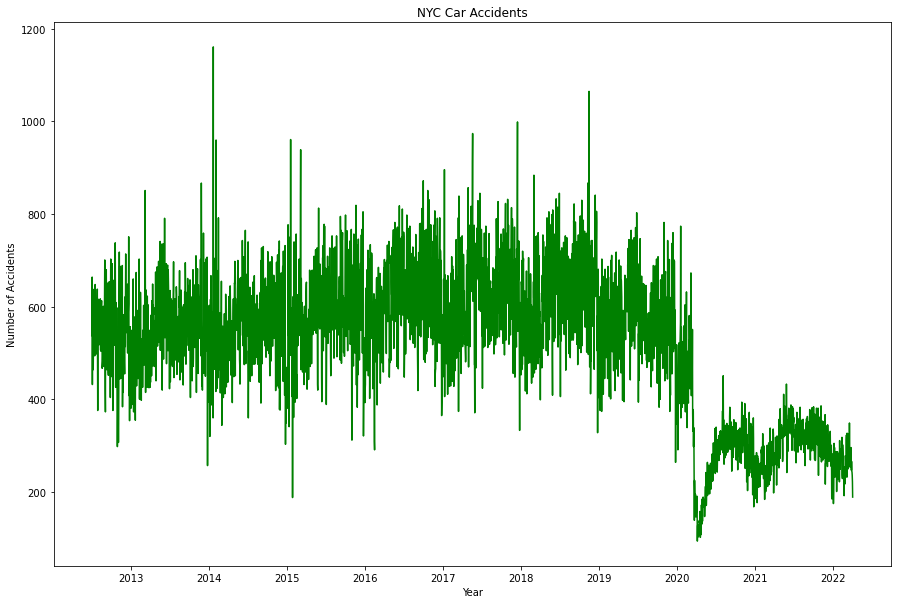

In [168]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))
plt.plot(nyc_data_new_TS['Accidents_Total'],color='green', label='Total')
plt.title('NYC Car Accidents')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')

Text(0, 0.5, 'Number of Accidents')

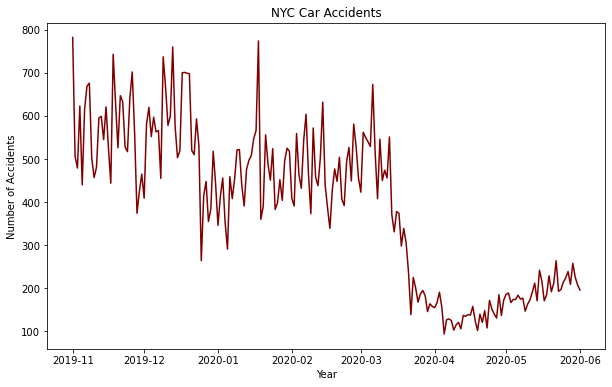

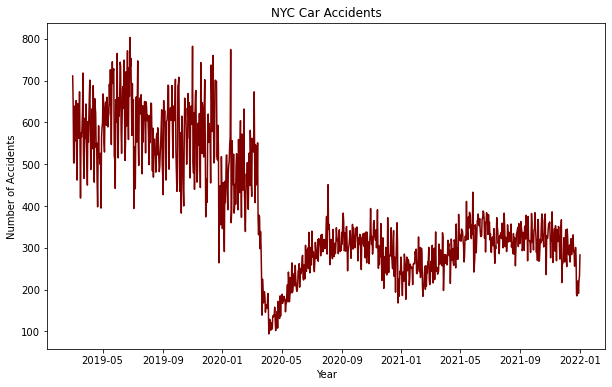

In [169]:

fig, ax = plt.subplots(figsize=(10,6))
plt.plot(nyc_data_new_TS['Accidents_Total'].loc['2019-11-1':'2020-6-1'],color='maroon', label='Total')
plt.title('NYC Car Accidents')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')


fig3, ax4 = plt.subplots(figsize=(10,6))
plt.plot(nyc_data_new_TS['Accidents_Total'].loc['2019-3-1':'2022-1-1'],color='maroon', label='Total')
plt.title('NYC Car Accidents')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')

In [170]:
nyc_data_new_TS.head()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID,Accidents_Total,Season,Day of Week,Weekend
Date,,,,,,,,,,,,,,,
2012-07-01,18442.904663,-33491.632905,166.0,0.0,30,0,9,0,127,0,246030120,538,2,6,1
2012-07-02,19425.178807,-35265.365234,175.0,1.0,30,0,27,0,118,1,227948144,564,2,0,0
2012-07-03,23742.164563,-43100.298297,210.0,1.0,36,0,16,0,158,1,244660163,664,2,1,0
2012-07-04,14700.072288,-26684.138601,156.0,0.0,20,0,9,0,127,0,217121455,432,2,2,0
2012-07-05,20482.097556,-37184.022746,138.0,1.0,28,1,14,0,96,0,247954045,591,2,3,0


In [171]:
nyc_data_new_TS.drop(labels=['NUMBER OF PEDESTRIANS INJURED','NUMBER OF PEDESTRIANS KILLED',
                      'NUMBER OF CYCLIST INJURED','NUMBER OF CYCLIST KILLED',
                      'NUMBER OF MOTORIST INJURED','NUMBER OF MOTORIST KILLED','COLLISION_ID','NUMBER OF PERSONS KILLED', 'NUMBER OF PERSONS INJURED',
                      'LATITUDE','LONGITUDE'],
             axis=1, inplace=True)

nyc_data_new_TS['Day'] = nyc_data_new_TS.index.day
nyc_data_new_TS['Month'] = nyc_data_new_TS.index.month
nyc_data_new_TS['Year'] = nyc_data_new_TS.index.year
nyc_data_new_TS.head()

,Accidents_Total,Season,Day of Week,Weekend,Day,Month,Year
Date,,,,,,,
2012-07-01,538,2,6,1,1,7,2012
2012-07-02,564,2,0,0,2,7,2012
2012-07-03,664,2,1,0,3,7,2012
2012-07-04,432,2,2,0,4,7,2012
2012-07-05,591,2,3,0,5,7,2012


In [172]:
nyc_data_new_TS.to_csv('nyc_data_new_TS.csv',index=False)

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve,f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

In [174]:
nyc_data_new_TS['Date'] = nyc_data_new_TS.index

In [175]:
train_features = nyc_data_new_TS[nyc_data_new_TS.Date <'2019-01-21'].drop(columns ='Date')
train_labels = nyc_data_new_TS[nyc_data_new_TS.Date <'2019-01-21'].drop(columns ='Date')
test_features = nyc_data_new_TS[nyc_data_new_TS.Date <'2020-01-21']
test_features = test_features[test_features.Date > '2019-01-21'].drop(columns ='Date')
test_labels = nyc_data_new_TS[nyc_data_new_TS.Date <'2020-01-21']
test_labels = test_labels[test_labels.Date > '2019-01-21'].drop(columns ='Date')
predict_labels = nyc_data_new_TS[nyc_data_new_TS.Date > '2020-01-21'].drop(columns ='Date')
predict_features = nyc_data_new_TS[nyc_data_new_TS.Date > '2020-01-21'].drop(columns ='Date')

In [176]:
train_features.drop(columns ='Accidents_Total')
test_features.drop(columns ='Accidents_Total')
predict_features.drop(columns ='Accidents_Total')
train_labels = train_labels['Accidents_Total']
test_labels = test_labels['Accidents_Total']
predict_labels = predict_labels['Accidents_Total']

In [177]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)
print('Predicting Features Shape:', predict_features.shape)
print('Predicting Labels Shape:', predict_labels.shape)

Training Features Shape: (2395, 7)
Training Labels Shape: (2395,)
Testing Features Shape: (364, 7)
Testing Labels Shape: (364,)
Predicting Features Shape: (802, 7)
Predicting Labels Shape: (802,)


In [178]:
RandomForestRegressor_model = RandomForestRegressor(n_estimators=500,max_depth=10, random_state=42, max_features = 'auto')
RandomForestRegressor_model.fit(train_features, train_labels)

RandomForestRegressor(max_depth=10, n_estimators=500, random_state=42)

In [179]:
RandomForestRegressor_predict = RandomForestRegressor_model.predict(test_features)
print(RandomForestRegressor_predict)

[627.002      552.988      591.998      665.996      533.042
 444.578      564.97       681.         629.996      600.994
 651.012      576.99       489.986      651.01       570.
 615.01       586.984      660.988      540.         444.514
 568.         686.996      639.008      663.704      615.992
 534.982      438.974      405.978      526.992      615.
 596.992      545.992      439.002      400.49274048 699.984
 670.078      529.026      699.002      711.03233333 641.988
 502.774      502.818      639.008      589.006      555.992
 652.         523.02       462.1        644.988      585.998
 561.95       610.994      673.082      550.         418.44784762
 575.008      564.98       584.         624.01       717.9055
 529.988      465.974      525.994      609.998      561.954
 644.01       563.002      516.004      449.86       602.
 552.984      613.         660.002      701.031      586.99
 486.978      594.016      536.95       633.028      536.946
 687.994      598.998      4

Mean Absolute Error:  0.12209706789923334
Mean Squared Error:  0.3648277429118718
Random Forest Regressor Model Score on training data:  0.9997501912029155
364   364


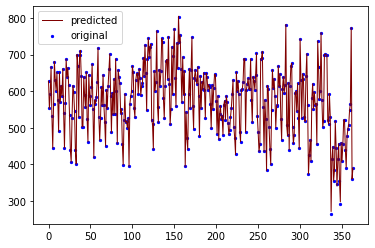

In [180]:
print('Mean Absolute Error: ', mean_absolute_error(test_labels, RandomForestRegressor_predict))
print('Mean Squared Error: ', mean_squared_error(test_labels, RandomForestRegressor_predict)) 
print('Random Forest Regressor Model Score on training data: ', RandomForestRegressor_model.score(train_features, train_labels))
print(RandomForestRegressor_predict.size, " ", test_labels.size )

x_ax=range(364)
plt.scatter(x_ax, test_labels, s=5, color="blue", label="original")
plt.plot(x_ax, RandomForestRegressor_predict, lw=1.0, color="maroon", label="predicted")
plt.legend()
plt.show()

In [181]:
KNN_model = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=8, p=2,
          weights='uniform')
# print(KNN_model)
KNN_model.fit(train_features, train_labels)

KNeighborsRegressor(n_jobs=1, n_neighbors=8)

Mean Absolute Error:  1.0367445054945055
Mean Squared Error:  5.705228365384615
KNN Model Score on training data:  0.9980308406729483
364   364


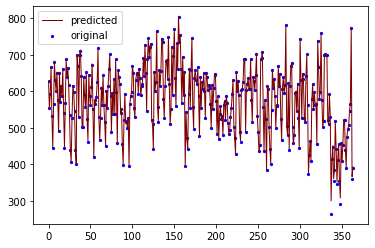

In [182]:
KNN_predict = KNN_model.predict(test_features)
print('Mean Absolute Error: ', mean_absolute_error(test_labels, KNN_predict))
print('Mean Squared Error: ', mean_squared_error(test_labels, KNN_predict))
print('KNN Model Score on training data: ', KNN_model.score(train_features, train_labels))
# print('KNN Model Score on test data: ', KNN_model.score(test_features, test_labels))
print(KNN_predict.size, " ", test_labels.size )

x_ax=range(364)
plt.scatter(x_ax, test_labels, s=5, color="blue", label="original")
plt.plot(x_ax, KNN_predict, lw=1.0, color="maroon", label="predicted")
plt.legend()
plt.show()

In [183]:
RandomForestRegressorpredict_onPredict = RandomForestRegressor_model.predict(predict_features)
RandomForestRegressorpredict_onPredict = RandomForestRegressorpredict_onPredict.tolist()
predict_labels = predict_labels.tolist()
# print(RandomForestRegressorpredict_onPredict)
print(len(predict_labels))
print(len(RandomForestRegressorpredict_onPredict))

802
802


In [184]:
nyc_data_new_TS_reset = nyc_data_new_TS
nyc_data_new_TS_reset['row_num'] = range(1, len(nyc_data_new_TS_reset) + 1)
predicted_dates = nyc_data_new_TS_reset[nyc_data_new_TS_reset.Date > '2020-01-21']
print(predicted_dates['Date'])





Date
2020-01-22   2020-01-22
2020-01-23   2020-01-23
2020-01-24   2020-01-24
2020-01-25   2020-01-25
2020-01-26   2020-01-26
                ...    
2022-03-29   2022-03-29
2022-03-30   2022-03-30
2022-03-31   2022-03-31
2022-04-01   2022-04-01
2022-04-02   2022-04-02
Name: Date, Length: 802, dtype: datetime64[ns]


In [185]:
predicted_dates_t = predicted_dates[predicted_dates.Date < '2020-12-20'] 
# -- 2801, 2861 // 2762
print(predicted_dates_t[predicted_dates_t['Month'].isin({1})])
plot_range_predicted = RandomForestRegressorpredict_onPredict[39:99]
plot_range_actual = predict_labels[39:99]
date_range = predicted_dates['Date'].tolist()
date_range = date_range[39:99]
print(date_range)
print(plot_range_predicted)


            Accidents_Total  Season Day of Week  Weekend  Day  Month  Year  \
Date                                                                         
2020-01-22              489       0           2        0   22      1  2020   
2020-01-23              451       0           3        0   23      1  2020   
2020-01-24              524       0           4        0   24      1  2020   
2020-01-25              383       0           5        1   25      1  2020   
2020-01-26              398       0           6        1   26      1  2020   
2020-01-27              452       0           0        0   27      1  2020   
2020-01-28              404       0           1        0   28      1  2020   
2020-01-29              495       0           2        0   29      1  2020   
2020-01-30              525       0           3        0   30      1  2020   
2020-01-31              518       0           4        0   31      1  2020   

                 Date  row_num  
Date                          

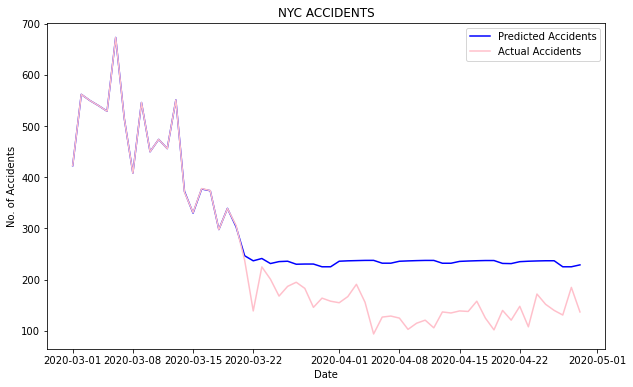

In [186]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(date_range, plot_range_predicted, color='blue', label='Predicted Accidents')
plt.plot(date_range, plot_range_actual, color='pink', label='Actual Accidents')
plt.title('NYC ACCIDENTS')
plt.xlabel('Date')
plt.ylabel('No. of Accidents')
plt.legend()

In [197]:
nyc_data_new_year = nyc_data_new_TS
nyc_data_new_year['Accidents'] = 1
# nyc_data_new_year = nyc_data_new_year.drop(columns = 'Accidents_Total')
nyc_data_new_year = nyc_data_new_year.groupby(nyc_data_new_year['Year'],as_index=False)['Accidents_Total'].apply(lambda x : x.astype(int).sum())

In [199]:
print(nyc_data_new_year.head(10))

   Year  Accidents_Total
0  2012           100545
1  2013           203734
2  2014           206033
3  2015           217694
4  2016           229831
5  2017           231007
6  2018           231563
7  2019           211485
8  2020           112904
9  2021           110501


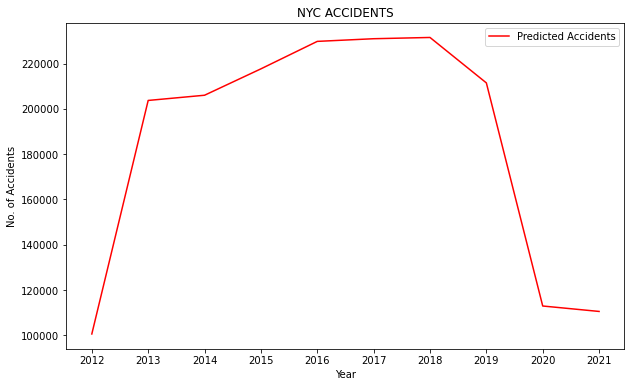

In [200]:
year_list = ['2012', '2013', '2014', '2015', '2016', '2017','2018','2019','2020','2021']
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(year_list, nyc_data_new_year['Accidents_Total'].head(10), color='red', label='Predicted Accidents')
plt.title('NYC ACCIDENTS')
plt.xlabel('Year')
plt.ylabel('No. of Accidents')
plt.legend()

In [206]:
decrease_rate_19_20 = ((nyc_data_new_year.loc[7]['Accidents_Total'] - nyc_data_new_year.loc[8]['Accidents_Total'])/nyc_data_new_year.loc[7]['Accidents_Total']) * 100
decrease_rate_18_19 = ((nyc_data_new_year.loc[6]['Accidents_Total'] - nyc_data_new_year.loc[7]['Accidents_Total'])/nyc_data_new_year.loc[6]['Accidents_Total']) * 100
decrease_rate_17_18 = ((nyc_data_new_year.loc[5]['Accidents_Total'] - nyc_data_new_year.loc[6]['Accidents_Total'])/nyc_data_new_year.loc[5]['Accidents_Total']) * 100
decrease_rate_16_17 = ((nyc_data_new_year.loc[4]['Accidents_Total'] - nyc_data_new_year.loc[5]['Accidents_Total'])/nyc_data_new_year.loc[4]['Accidents_Total']) * 100
decrease_rate_15_16 = ((nyc_data_new_year.loc[3]['Accidents_Total'] - nyc_data_new_year.loc[4]['Accidents_Total'])/nyc_data_new_year.loc[3]['Accidents_Total']) * 100
decrease_rate_14_15 = ((nyc_data_new_year.loc[2]['Accidents_Total'] - nyc_data_new_year.loc[3]['Accidents_Total'])/nyc_data_new_year.loc[2]['Accidents_Total']) * 100
decrease_rate_13_14 = ((nyc_data_new_year.loc[1]['Accidents_Total'] - nyc_data_new_year.loc[2]['Accidents_Total'])/nyc_data_new_year.loc[1]['Accidents_Total']) * 100
decrease_rate_12_13 = ((nyc_data_new_year.loc[0]['Accidents_Total'] - nyc_data_new_year.loc[1]['Accidents_Total'])/nyc_data_new_year.loc[0]['Accidents_Total']) * 100
print("Decrease from 2019 to 2020: " + str(decrease_rate_19_20) + "%" )
print("Decrease from 2018 to 2019: " + str(decrease_rate_18_19) + "%" )
print("Decrease from 2017 to 2018: " + str(decrease_rate_17_18) + "%" )
print("Decrease from 2016 to 2017: " + str(decrease_rate_16_17) + "%" )
print("Decrease from 2015 to 2016: " + str(decrease_rate_15_16) + "%" )
print("Decrease from 2014 to 2015: " + str(decrease_rate_14_15) + "%" )
print("Decrease from 2013 to 2014: " + str(decrease_rate_13_14) + "%" )
print("Decrease from 2012 to 2013: " + str(decrease_rate_12_13) + "%" )


Decrease from 2019 to 2020: 46.613707827978345%
Decrease from 2018 to 2019: 8.670642546520817%
Decrease from 2017 to 2018: -0.24068534719727108%
Decrease from 2016 to 2017: -0.5116803216276308%
Decrease from 2015 to 2016: -5.575257012136301%
Decrease from 2014 to 2015: -5.6597729489936075%
Decrease from 2013 to 2014: -1.1284321713606957%
Decrease from 2012 to 2013: -102.62966830772291%
